<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/marco-canas/calculo/blob/main/classes/3_differentiation/3_aplication_diff/6_minimizar_energia_consumida_por_pez/minimizacion_energia_pez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

## [Programa del curso de Cálculo diferencial](https://github.com/marco-canas/calculo/blob/main/1_programa_calculo_diferencial_ingenieria_agropecuaria.docx)

## Imágenes que hacen vivo este trabajo de didactica del cálculo

<img src = 'https://github.com/marco-canas/calculo/blob/main/images/student_images/WhatsApp%20Image%202023-09-15%20at%209.59.32%20AM.jpeg?raw=true'>

<img src = ''>
<img src = ''>
<img src = ''>
<img src = ''>
<img src = ''>
<img src = ''>



### [Video de apoyo a la lectura interactiva y experimental de este cuaderno](https://www.youtube.com/watch?v=15pz6_49iEw)

## Invitación al evento de los estudiantes de ingeniería

<img src = 'https://github.com/marco-canas/calculo/blob/main/images/evento-regiones-ingenieria.png?raw=true'>

# Vocabulario en inglés asociado a esta clase de modelación 

1. plot: trazar o graficar. 
2. import: importar librerías o conjunto de funciones para hacer tareas de modelación. 
3. definition: definición 
4. define: definir
5. label: Etiqueta o nombre del eje
6. title: Título
7. return: retornar o entregar un valor calculado a partir de la variable de entrada. 
8. show: mostrar el gráfico
9. size: tamaño
10. figure: figura. 
11. legend: legenda o convención.  
12. fish: pez. 
13. wild animals: animales salvajes. 

[grabación de la pronunciación del vocabulario asociado](https://voca.ro/1dQbgLjsZROJ)

# Optimización de la energía empleada en nadar a contracorriente como función de la velocidad. 

# Plantear el problema

Ejemplo 4, página 169 del Purcell (Cálculo diferencial e integral).  


Suponga que un pez nada río arriba con velocidad relativa al agua $v$ y que la corriente del río tiene velocidad $-v_{c}$ (el signo negativo indica que la velocidad de la corriente es en dirección opuesta a la del pez).   

La energía empleada en recorrer una distancia $d$ a contracorriente es directamente proporcional al tiempo requerido para recorrer la distancia $d$ y el cubo de la velocidad.   

¿Qué velocidad $v$ minimiza la energía empleada en nadar esta distancia?



<img src = 'https://animaldatos.com/wp-content/uploads/2021/08/peces-nada-contracorriente.jpg'>


# Dar sentido al problema con imágenes y videos


# Solución del problema  

1. Construir la función objetivo o la función a optimizar $E(v)$
2. Evaluarla de manera puntual para establecer una suposición sobre donde se optimiza. Esta evaluación puntual la podemos condensar en una tabla. 
3. graficar para ganar seguridad o corregir. 
4. derivar, igualar a cero y resolver para asegurarse sobre la velocidad adecuada para que la energía consumida sea mínima.  

$$ E \ \ \alpha \ \ tv^{3} $$

$$ E = ktv_{pez}^{3} $$

donde $t$ es el tiempo que tarda nadando. 

$$ v = \frac{d}{t} \to \ \ \ t = \frac{d}{v} = \frac{d}{v_{pez} - v_{rio}} $$

$$ E_{empleada} = k \cdot \frac{d}{v_{pez} - v_{rio}}v_{pez}^{3} $$



In [3]:
# definir funcion
constante = 1
velocidad_rio = 10  # (en kilómetros por hora)
distancia = 1       # (en kilómetros)

def energia_empleada(velocidad_pez):      # definir funciones con lenguaje materno o natural
    return constante*(distancia/(velocidad_pez-velocidad_rio))*velocidad_pez**3

In [4]:
# evaluar la funcion en diversos puntos del dominio 

energia_empleada(velocidad_pez = 14), energia_empleada(15), energia_empleada(16)


(686.0, 675.0, 682.6666666666666)

## Sistematización de estas observaciones puntuales 

In [5]:
import pandas as pd 
import numpy as np 

velocidades = np.array([1, 2, 3, 14, 15, 16, 17, 18, 20])
energias = energia_empleada(velocidades)

table = pd.DataFrame({'velocidad del pez': velocidades, 'energias empleadas': energias})
table 

,velocidad del pez,energias empleadas
0,1,-0.111111
1,2,-1.000000
2,3,-3.857143
3,14,686.000000
4,15,675.000000
5,16,682.666667
6,17,701.857143
7,18,729.000000
8,20,800.000000


## Hipótesis, conjetura o suposición: 

Parece ser que la energía se minimiza cuando la velocidad es de $15$. 

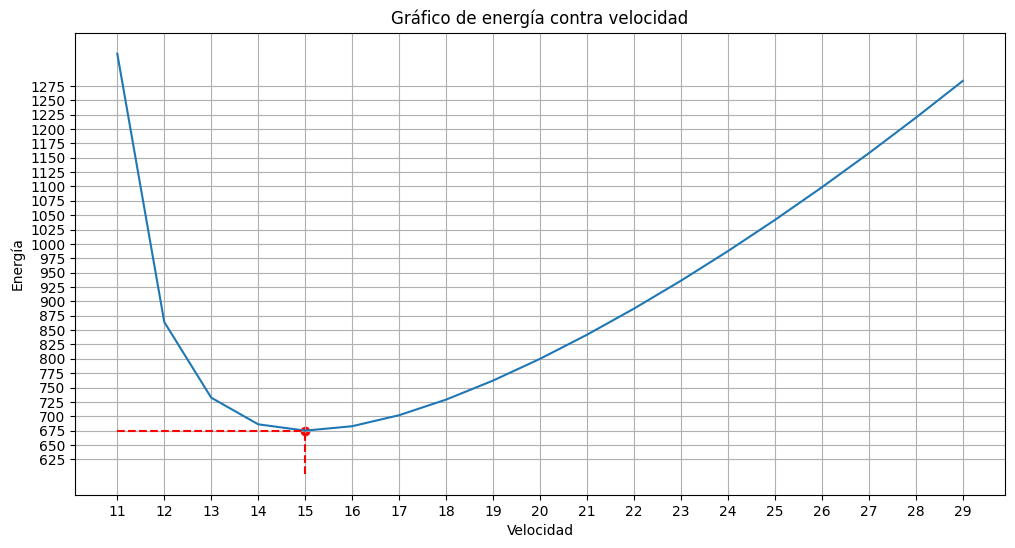

In [7]:
# graficar la funcion
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize = (12, 6))

plt.title('Gráfico de energía contra velocidad')

velocidades = np.arange(11, 30)

energias = energia_empleada(velocidades)

plt.plot(velocidades, energias)                  # gráfico de líneas con la función plot()


plt.xlabel('Velocidad')

plt.ylabel('Energía')

plt.grid(alpha = 1)  # poner la cuadrícula

plt.yticks(np.arange(625, 1300, 25))  # metrizar el eje vertical

plt.xticks(np.arange(10, 30, 1))  # metrizar el eje horizontal

plt.scatter([15], [675], color = 'red')

plt.plot([15, 15], [600, 675], 'r--')
plt.plot([11, 15], [675, 675], 'r--')

plt.show()



Mi suposición parece cierta, pues el gráfico me indica que la energía, se minimiza para una velocidad de 15 y esa energía mínima es de 675 unidades de energía (algunas unidades de energía son los julios). 

In [10]:
# derivar e igualar a cero para encontrar los puntos críticos

from sympy import * # en sympy las dos son con y

k,d, velocidad_pez, velocidad_rio, energia_empleada = var("k,d, velocidad_pez, velocidad_rio, energia_empleada")
d = 1
velocidad_rio = 10
k = 1

energia_empleada = k*(d/(velocidad_pez-velocidad_rio))*velocidad_pez**3

derivada = diff(energia_empleada, velocidad_pez)

ecuacion = Eq(derivada, 0)    # f'(x) = 0

if solve(ecuacion, velocidad_pez)[1].evalf() == 15:
    print('Efectivamente, el pez se debe mover a una velocidad de 15 para tener el menor consumo de energía')




Efectivamente, el pez se debe mover a una velocidad de 15 para tener el menor consumo de energía


# Redactar la conclusión o conclusiones

La velocidad necesaria para minimizar la energía empleada en nadar a contracorriente una distancia de un kilometro es de $15$ $Km/h$. Esto me lo aseguró, la derivada de la función de energía que tenía.  

# Gráfico interactivo con plotly



In [10]:
import plotly.express as px 
import plotly.io as pio


fig = px.line(tabla_completa, x = 'Velocidades del pez', y = 'Energias empleadas', \
              title = 'Energía empleada vs velocidad del pez en contracorriente')

fig.show() 

pio.write_image(fig, 'energia_vs_velocidad.jpg')


* La función de energía es decreciente antes de 15 y creciente para valores mayores de 15. Es decir, si el pez se quiere mover a una velocidad mayor a 15, entonces, la energía empleada será cada vez mayor. 

## Referentes  



* [stewart precálculo](https://udeaeduco-my.sharepoint.com/:b:/g/personal/marco_canas_udea_edu_co/ERHIq62I6qFNrmxy6LZb8ZMBci7kUsyNME1nIh9yCBMJ_w?e=0zMSla)  

* [stewart cálculo](https://udeaeduco-my.sharepoint.com/:b:/g/personal/marco_canas_udea_edu_co/EZgXZjAp8QxPqOAim2hs6LcBNPLGjSHf-xwYnUVYkwa04w?e=RZdTCy)  

* [larson](https://udeaeduco-my.sharepoint.com/:b:/g/personal/marco_canas_udea_edu_co/ES71ChFeO9ZDhW3TwC5Ijk8BjxUK3Pdqz_fjHxTTFAfIAg?e=VDEjfu)

* [uzcategui](https://udeaeduco-my.sharepoint.com/:b:/g/personal/marco_canas_udea_edu_co/ETDikm-lVl1Or8XoEo9oyh0BEti9Zs8le-f0D-dBdtZmbA?e=bBsoyQ)

* [Cálculo de Purcell](https://udeaeduco-my.sharepoint.com/:b:/g/personal/marco_canas_udea_edu_co/ES60UB4h-QFFqqRQUFmkpWcBIgoLBJeqTfZjNajWNWSeJA?e=9NxjKJ)

* [Recomendación de la UNESCO sobre ciencia abierta](https://unesdoc.unesco.org/ark:/48223/pf0000379949_spa)

* [Fórmulas más comunes en latex](https://wiki.geogebra.org/es/C%C3%B3digo_LaTeX_para_las_f%C3%B3rmulas_m%C3%A1s_comunes) 

* [chatGPT](https://openai.com/blog/chatgpt)  

* Géron, A. (2017). Hands-on machine learning with scikit-learn and tensorflow: Concepts. Tools, and Techniques to build intelligent systems.[Geron, Aurelien. Hands on Machine Learning](https://udeaeduco-my.sharepoint.com/:b:/g/personal/marco_canas_udea_edu_co/Ecet27yjQzZIlT1Y_Bc2erkBUhbeYuIe6HG8i1FYZRlZww?e=dlvZ4v)  

* McKinney, W. (2012). Python for data analysis: Data wrangling with Pandas, NumPy, and IPython. " O'Reilly Media, Inc.".[Wes Mackinney. ](https://udeaeduco-my.sharepoint.com/:b:/g/personal/marco_canas_udea_edu_co/EVbi5JIeBl9ErbiUnZfGe8YBhNTnZ8sxTK5hjIOPK4UpGw?e=fFclah)